In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [3]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [4]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [5]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [7]:
#from keras.datasets import mnist
#import numpy as np
#(x_train, _), (x_test, _) = mnist.load_data()

#x_train = x_train.astype('float32') / 255.
#x_test = x_test.astype('float32') / 255.
#x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
#x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
#print(x_train.shape)
#print(x_test.shape)

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

x_train, x_test = data.train.images, data.test.images
print(x_train.shape)

x_train = (x_train - np.mean(x_train))/np.std(x_train)
x_test = (x_test - np.mean(x_test))/np.std(x_test)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000
(55000, 784)


In [9]:
model = autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 55000 samples, validate on 10000 samples
Epoch 1/20
55000/55000 [==============================] - 6s - loss: -3.8244 - val_loss: -5.6284
Epoch 2/20
55000/55000 [==============================] - 5s - loss: -6.0198 - val_loss: -6.4361
Epoch 3/20
55000/55000 [==============================] - 5s - loss: -6.5526 - val_loss: -6.8102
Epoch 4/20
55000/55000 [==============================] - 5s - loss: -6.8502 - val_loss: -7.0399
Epoch 5/20
55000/55000 [==============================] - 5s - loss: -7.0388 - val_loss: -7.1945
Epoch 6/20
55000/55000 [==============================] - 5s - loss: -7.1719 - val_loss: -7.3101
Epoch 7/20
55000/55000 [==============================] - 5s - loss: -7.2783 - val_loss: -7.4043
Epoch 8/20
55000/55000 [==============================] - 5s - loss: -7.3665 - val_loss: -7.4834
Epoch 9/20
55000/55000 [==============================] - 5s - loss: -7.4410 - val_loss: -7.5509
Epoch 10/20
55000/55000 [==============================] - 5s - loss: -7.5047

In [10]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

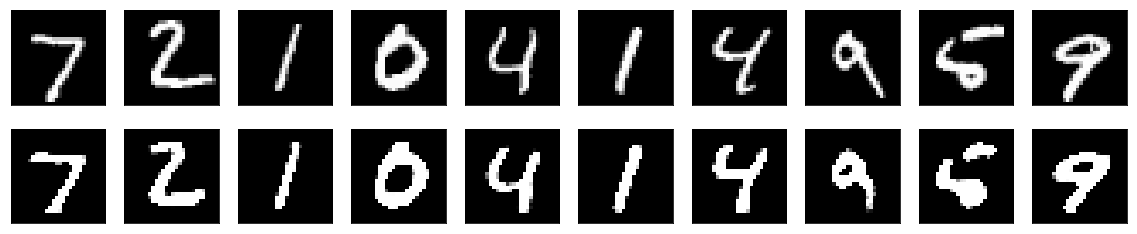

In [11]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()